In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:33<00:00, 39.3MB/s]
100% 1.06G/1.06G [00:33<00:00, 34.0MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [9]:
#genrator

train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)



Found 20000 files belonging to 2 classes.


In [11]:
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 5000 files belonging to 2 classes.


In [12]:
#normalize
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [23]:
from tensorflow.python.framework.func_graph import flatten
from keras.engine import sequential
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 106ms/step - loss: 0.7939 - accuracy: 0.6014 - val_loss: 469.9297 - val_accuracy: 0.5006
Epoch 2/10
625/625 [==============================] - 79s 125ms/step - loss: 0.5689 - accuracy: 0.6995 - val_loss: 289.2812 - val_accuracy: 0.5472
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4853 - accuracy: 0.7625 - val_loss: 286.2151 - val_accuracy: 0.5646
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3997 - accuracy: 0.8138 - val_loss: 119.8949 - val_accuracy: 0.5388
Epoch 5/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3280 - accuracy: 0.8543 - val_loss: 135.1866 - val_accuracy: 0.5502
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2421 - accuracy: 0.8953 - val_loss: 189.5268 - val_accuracy: 0.5636
Epoch 7/10
625/625 [==============================] - 68s 109ms/step - loss: 0.1757 - accuracy: 0.9281 - val_loss: 88.

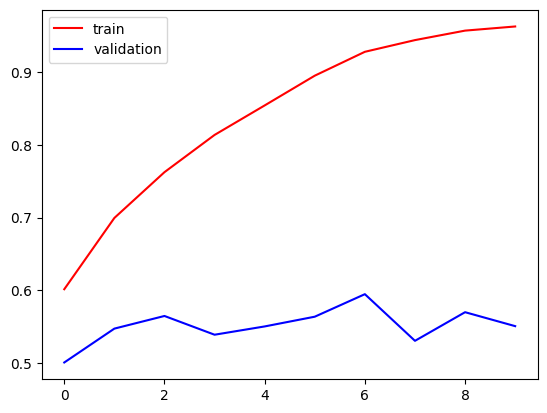

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

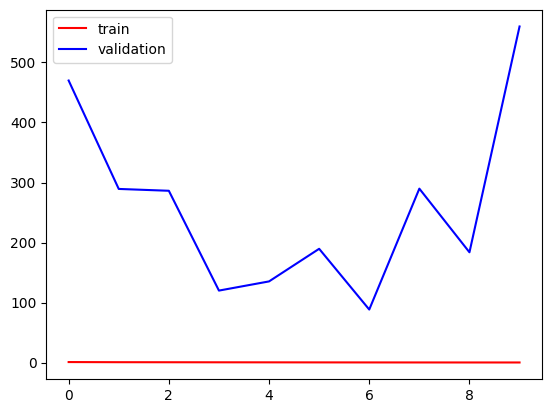

In [28]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()